In [1]:
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c plant-seedlings-classification
!unzip plant-seedlings-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/ad12382d4.png      
  inflating: test/adb7a032c.png      
  inflating: test/ae90f2827.png      
  inflating: test/aecfaed64.png      
  inflating: test/aee6fa3df.png      
  inflating: test/af45e222a.png      
  inflating: test/afa446484.png      
  inflating: test/afcf6abd5.png      
  inflating: test/b026bf8ca.png      
  inflating: test/b03397525.png      
  inflating: test/b0acaff4a.png      
  inflating: test/b130a0632.png      
  inflating: test/b145ba9d4.png      
  inflating: test/b1cd2a91e.png      
  inflating: test/b215531dd.png      
  inflating: test/b2706e2b3.png      
  inflating: test/b29339405.png      
  inflating: test/b30ab4659.png      
  inflating: test/b31292706.png      
  inflating: test/b341d0aab.png      
  inflating: test/b39c71707.png      
  inflating: test/b3d6fdb80.png      
  inflating: test/b3e08b037.png      
  inflating: test/b47691c08.png      
  inflating: test/b4c3df835.png      

In [49]:

# Import necessary libraries
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [4]:
!ls ../content/train

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [3]:
CATEGORIES = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

In [7]:
data_path = '/content/'
train_dir = os.path.join(data_path,'train')
test_dir = os.path.join(data_path, 'test')

In [29]:
train = []
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir, category)):
        train.append(['train/{}/{}'.format(category, file), category_id, category])
train = pd.DataFrame(train, columns=['file', 'category_id', 'category'])
train.head(2)
train.shape

(4750, 3)

In [32]:
train

,file,category_id,category
0,train/Black-grass/a87fd277c.png,0,Black-grass
1,train/Black-grass/39e9bf4c7.png,0,Black-grass
2,train/Black-grass/5e4d1ee0d.png,0,Black-grass
3,train/Black-grass/b790f7be5.png,0,Black-grass
4,train/Black-grass/75ef53b3b.png,0,Black-grass
...,...,...,...
4745,train/Sugar beet/6bb2545d9.png,11,Sugar beet
4746,train/Sugar beet/8a977c224.png,11,Sugar beet
4747,train/Sugar beet/faaac2544.png,11,Sugar beet
4748,train/Sugar beet/4c9ea912c.png,11,Sugar beet


In [143]:
# Split the data into train and validation data
train_datagen=ImageDataGenerator(validation_split = 0.2,
                                 rescale = 1./255,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True) 

In [145]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  subset = 'training',
                                                  color_mode = 'rgb',
                                                  # batch_size=32, 
                                                  class_mode = 'categorical',
                                                  shuffle=True
                                                  )



validation_generator=train_datagen.flow_from_directory(train_dir,
                                                       target_size=(224,224),
                                                       subset = 'validation', 
                                                       color_mode = 'rgb',
                                                       # batch_size=32, 
                                                       class_mode = 'categorical')
                                      

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [165]:
train_generator=train_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  color_mode = 'rgb',
                                                  # batch_size=32, 
                                                  class_mode = 'categorical',
                                                  )

Found 0 images belonging to 0 classes.


In [146]:
count=[]
plant=[]

In [147]:
for folder in sorted(os.listdir('/content/train')):
  #Takes length of all the image files combined, therefore returning count
  count.append(len(os.listdir('/content/train/'+folder)))
  #Creates a corresponding list of plant classes
  plant.append(folder)

In [148]:
print(count)
print(plant)

[263, 390, 287, 611, 221, 475, 654, 221, 516, 231, 496, 385]
['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


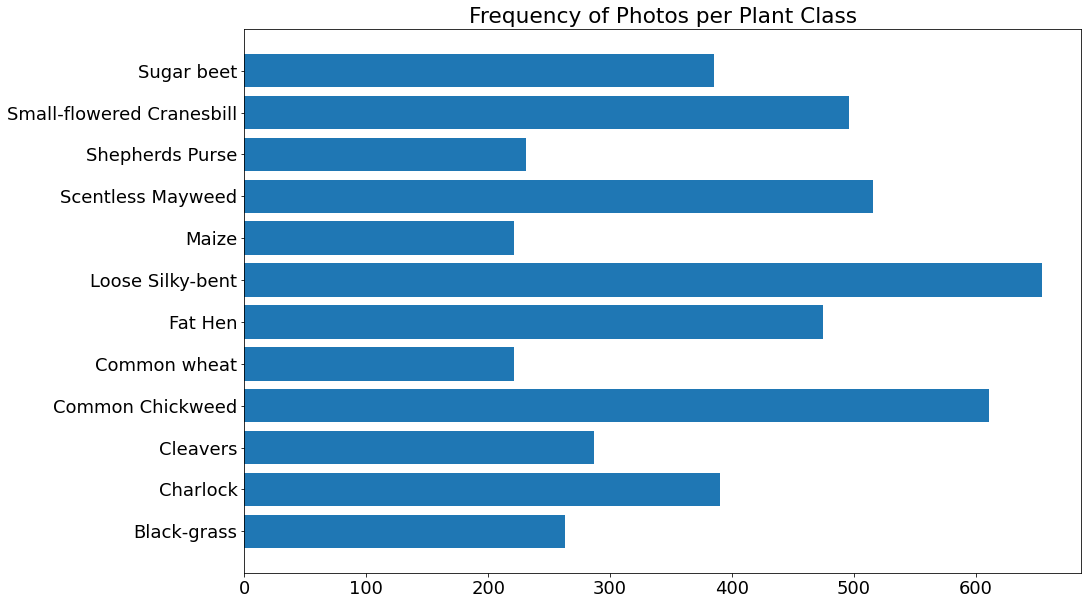

In [149]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(figsize=(15,10))
plt.barh(plant,count)
plt.title("Frequency of Photos per Plant Class")
plt.show()

In [121]:
plantdict = dict(zip(count, plant))
ordered = OrderedDict(sorted(plantdict.items()))


In [123]:
data=[0,1,2,3,4,5,6,7,8,9,10,11]
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=12)

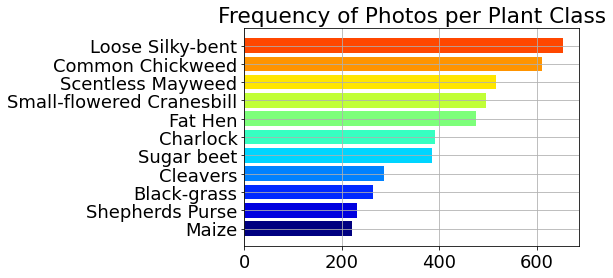

In [124]:
#Plotting horizontal bar plot with gird, colours and descending order of image count and respective plant classes
plt.barh(list(ordered.values()),list(ordered.keys()),color=my_cmap(my_norm(data)))
plt.title("Frequency of Photos per Plant Class")
plt.grid()
plt.show()

In [135]:
# Instantiate a VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [150]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [151]:
# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer
predictions = Dense(12, activation='softmax')(x)





In [138]:
# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [152]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [153]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [154]:

# Train the model
history=model.fit(train_generator, epochs=25, batch_size=32, validation_data=validation_generator)

Epoch 1/25
119/119 [==============================] - 171s 1s/step - loss: 1.2525 - accuracy: 0.5740 - val_loss: 1.2895 - val_accuracy: 0.5671
Epoch 2/25
119/119 [==============================] - 189s 2s/step - loss: 1.1807 - accuracy: 0.5898 - val_loss: 1.2911 - val_accuracy: 0.5459
Epoch 3/25
119/119 [==============================] - 177s 1s/step - loss: 1.1176 - accuracy: 0.6156 - val_loss: 1.2053 - val_accuracy: 0.5892
Epoch 4/25
119/119 [==============================] - 168s 1s/step - loss: 1.0839 - accuracy: 0.6290 - val_loss: 1.1428 - val_accuracy: 0.6019
Epoch 5/25
119/119 [==============================] - 168s 1s/step - loss: 1.0622 - accuracy: 0.6271 - val_loss: 1.1095 - val_accuracy: 0.6167
Epoch 6/25
119/119 [==============================] - 166s 1s/step - loss: 1.0174 - accuracy: 0.6400 - val_loss: 1.1418 - val_accuracy: 0.5987
Epoch 7/25
119/119 [==============================] - 167s 1s/step - loss: 0.9873 - accuracy: 0.6561 - val_loss: 1.1224 - val_accuracy: 0.6008

In [155]:
model.save('Train/Valid VGG16 25 epocs.h5')

In [156]:
print(os.path.getsize("Train/Valid VGG16 25 epocs.h5")/1048576, "MB")

62.369117736816406 MB


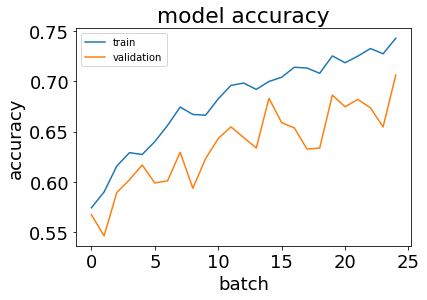

In [172]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend(['train', 'validation'], loc='upper left',fontsize=10)
plt.show()

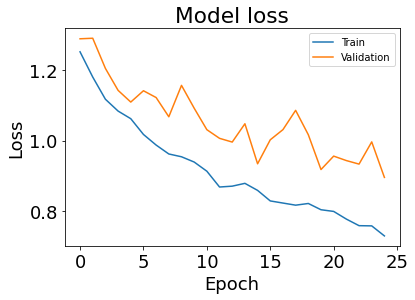

In [174]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=10)
plt.show()